Tackle Noise with error correction

In [17]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

In [18]:
from qiskit_aer.noise import NoiseModel,depolarizing_error

In [19]:
qc=QuantumCircuit(3,3)

In [20]:
qc.h(0)
qc.cx(0,1)
qc.cx(0,2)
qc.measure([0,1,2],[0,1,2])

In [21]:
noise_model = NoiseModel()

In [22]:
# Add depolarizing noise for single-qubit gates and two-qubit gates
depol_1q = depolarizing_error(0.01, 1)
depol_2q = depolarizing_error(0.02, 2)
noise_model.add_all_qubit_quantum_error(depol_1q, ['u3', 'x', 'h'])
noise_model.add_all_qubit_quantum_error(depol_2q, ['cx'])

In [23]:
# Use AerSimulator and noise model for simulation
backend = AerSimulator()

In [24]:
# Execute the quantum circuit with noise model
result_with_noise = backend.run(qc,noise_model=noise_model, shots=1024).result()

In [25]:
# Get the raw counts with noise
noisy_counts = result_with_noise.get_counts(qc)

In [26]:

# Simple mitigation technique: scale counts based on expected noise
mitigated_counts = {key: noisy_counts[key] * (1 - 0.02) for key in noisy_counts}

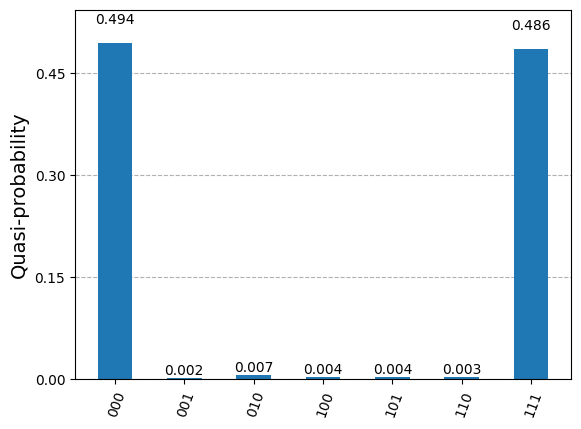

In [27]:
# Plot the mitigated results
plot_histogram(mitigated_counts)

In [28]:
print("Original counts:")
print(noisy_counts)

Original counts:
{'111': 498, '000': 506, '001': 2, '100': 4, '010': 7, '101': 4, '110': 3}


In [29]:
print("Mitigated counts:")
print(mitigated_counts)

Mitigated counts:
{'111': 488.03999999999996, '000': 495.88, '001': 1.96, '100': 3.92, '010': 6.859999999999999, '101': 3.92, '110': 2.94}


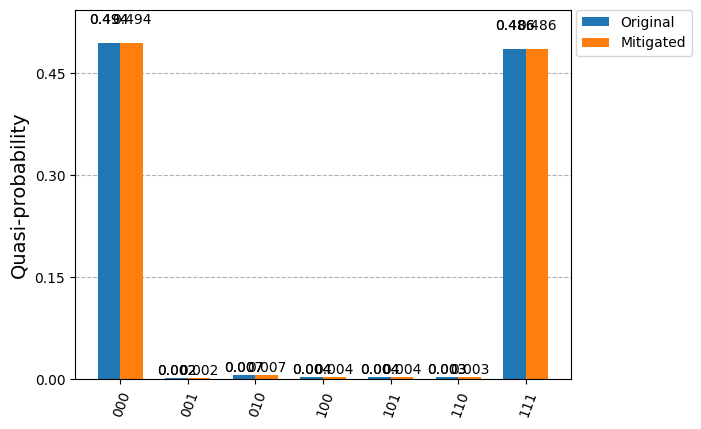

In [31]:
plot_histogram([noisy_counts, mitigated_counts], legend=['Original', 'Mitigated'])